# Week 3 SA

Hey Everyone!! 
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [2]:
df = pd.read_csv('Dataset/emails.csv')
df.shape

(5172, 3002)

## Describe the data and generate some basic insights unsing methods like .info

In [3]:
print(df.info())
#df.head()
print(df.describe())
#df.groupby("Prediction").describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None
               the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  .

## Looking at the data

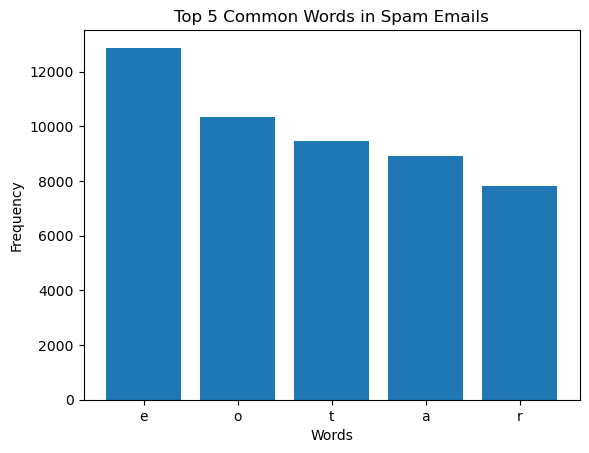

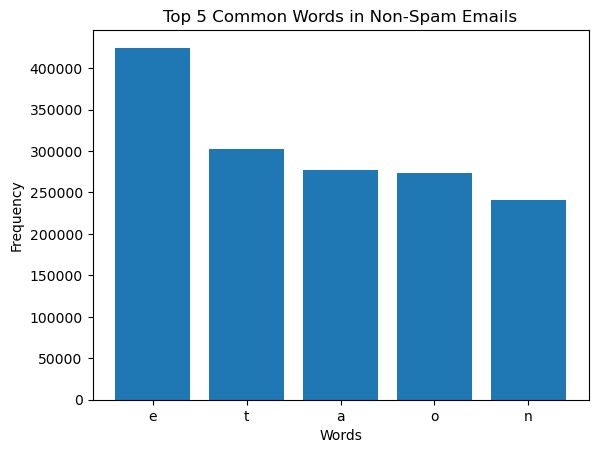

In [4]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
spam_emails = df[df['spam'] == 1]
non_spam_emails = df[df['spam'] == 0]
spam_words_freq = spam_emails.drop(['Email No.', 'spam'], axis=1).sum().sort_values(ascending=False)
non_spam_words_freq = non_spam_emails.drop(['Email No.', 'spam'], axis=1).sum().sort_values(ascending=False)
top_5_spam = spam_words_freq.head(5)

plt.bar(top_5_spam.index, top_5_spam)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 5 Common Words in Spam Emails')
plt.show()

top_5_non_spam = non_spam_words_freq.head(5)

plt.bar(top_5_non_spam.index, top_5_non_spam)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 5 Common Words in Non-Spam Emails')
plt.show()

## Figuring out some comparatively more important features

In [5]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset? 
# Try taking only top 1.5K that will comprise of some of the most "deciding factors" 
cols = sorted(list(df.columns[1:-1]),key=lambda col:(df[col].sum() ),reverse=True)[1500:]
df = df.drop(cols,axis=1)
print(df.shape)
df.head()

(5172, 1502)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,tue,fire,tm,del,trial,ended,plain,lay,ff,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,0,1,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,0,1,0


## Train - Test Split

In [6]:
# Create trianing and testing data
col_to_drop = ['Prediction','Email No.']
X = df.drop(col_to_drop, axis=1)
Y = df['Prediction']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

## Making Predictions using Multinomial NB Classifier

In [7]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,Y_train.values.reshape(-1))

MultinomialNB()

In [8]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
model.score(X_test,Y_test.values.reshape(-1))

0.9420103092783505

## Plot the confusion Matrix

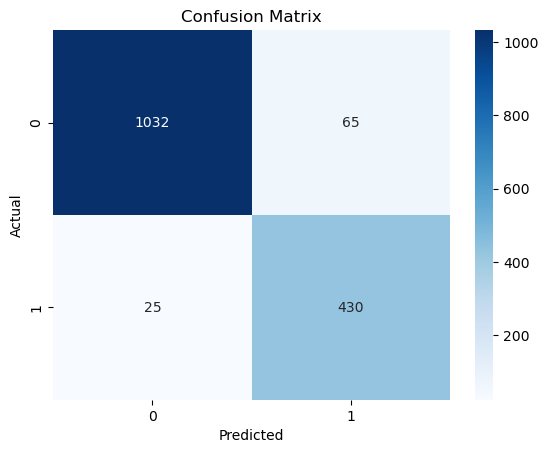

In [9]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt = 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Trying out with SVMs

In [10]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
df = pd.read_csv('Dataset/emails.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Email No.', 'Prediction'], axis=1), df.Prediction, test_size=0.33, random_state=52)
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train.values.reshape(-1))

SVC(kernel='linear')

In [11]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9543057996485061


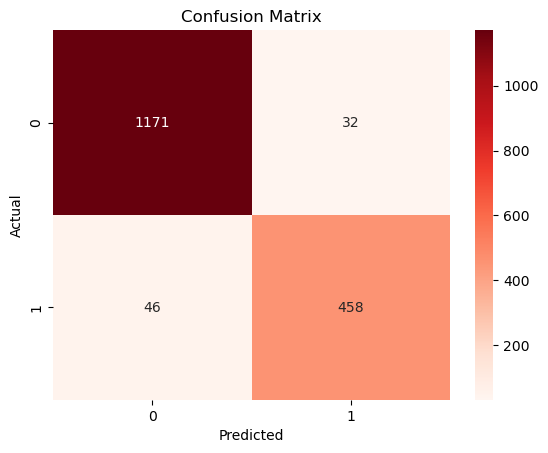

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparing the models

In [13]:
# Which model performed better?

Multinomial NB Classifier has score of : 0.9420103092783505
while SVC moded has score of: 0.9543057996485061
we can see that svc model performs slight better compared to NB classifer

In [14]:
# Can you suggest some reason for better performance of one model over the other?

The reason could be SVC is less sensitive to irrelevant features compared to NB.
The performance of SVC can be highly dependent on the choice of hyperparameters, such as the kernel type and here i have used linear kernel which has increased the score for svc model.

## Bonus Question

In [15]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example 
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
s = "I am a Python developer and currently working on a project to classify mails"
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([s])
vocabulary = vectorizer.get_feature_names_out()
frequencies = X.toarray()[0]
df = pd.DataFrame({'Word': vocabulary, 'Frequency': frequencies})
print(df)

         Word  Frequency
0          am          1
1         and          1
2    classify          1
3   currently          1
4   developer          1
5       mails          1
6          on          1
7     project          1
8      python          1
9          to          1
10    working          1


## Submitted by: Yashwin Tapdiya
## yashwintapdiya@gmail.com